# Example of dataset using environmental rasters and sentinel imagery

This is an example code of how tu use provided data providers and dataset to create a pytorch dataset based on patches data.

## Imports
Importing the providers and dataset objects:

In [12]:
from data.GLC23PatchesProviders import MultipleRasterPatchProvider, RasterPatchProvider, JpegPatchProvider
from data.GLC23Datasets import PatchesDataset, PatchesDatasetMultiLabel

## Providers

Define the list of providers: Providers are datareaders specific to a type of patch. ``JpegPatchProvider`` allows to find and load a jpeg patches from a 'patchID', ``MultipleRasterPatchProvider`` and ``RasterPatchProvider`` allow to read in one or multiple rasters to extract patches given coordinates. You need to configure the list of providers for the data you want to include in the tensor.

In [2]:
data_path = 'data/sample_data/' # root path of the data
# configure providers
p_hfp_d = MultipleRasterPatchProvider(data_path+'EnvironmentalRasters/HumanFootprint/detailed/') # take all rasters from human footprint detailed (2 rasters here)
p_bioclim = MultipleRasterPatchProvider(data_path+'EnvironmentalRasters/Climate/BioClimatic_Average_1981-2010/', select=['bio1', 'bio2']) # take only bio1 and bio2 from bioclimatic rasters (2 rasters from the 3 in the folder)
p_hfp_s = RasterPatchProvider(data_path+'EnvironmentalRasters/HumanFootprint/summarized/HFP2009_WGS84.tif') # take the human footprint 2009 summurized raster (a single raster)
p_rgb = JpegPatchProvider(data_path+'SatelliteImages/') # take all sentinel imagery layers (r,g,b,nir = 4 layers)

## Dataset

Construct the dataset object given the list of providers and the occurrences csv file: The ``PatchesDataset`` class inherits from the ``Dataset`` class of ``torch.utils.data``.

In [3]:
# create dataset
dataset = PatchesDataset(
    occurrences=data_path+'Presence_only_occurrences/Presences_only_train_sample.csv',
    providers=(p_hfp_d, p_bioclim, p_hfp_s, p_rgb))

## Examples of patches

After construction the ``PatchesDataset`` can return a tensor given an index of data.
Testing the dataset on random occurrences from the sample data:

Tensor type: <class 'torch.Tensor'>, tensor shape: torch.Size([9, 128, 128]), label: 6523


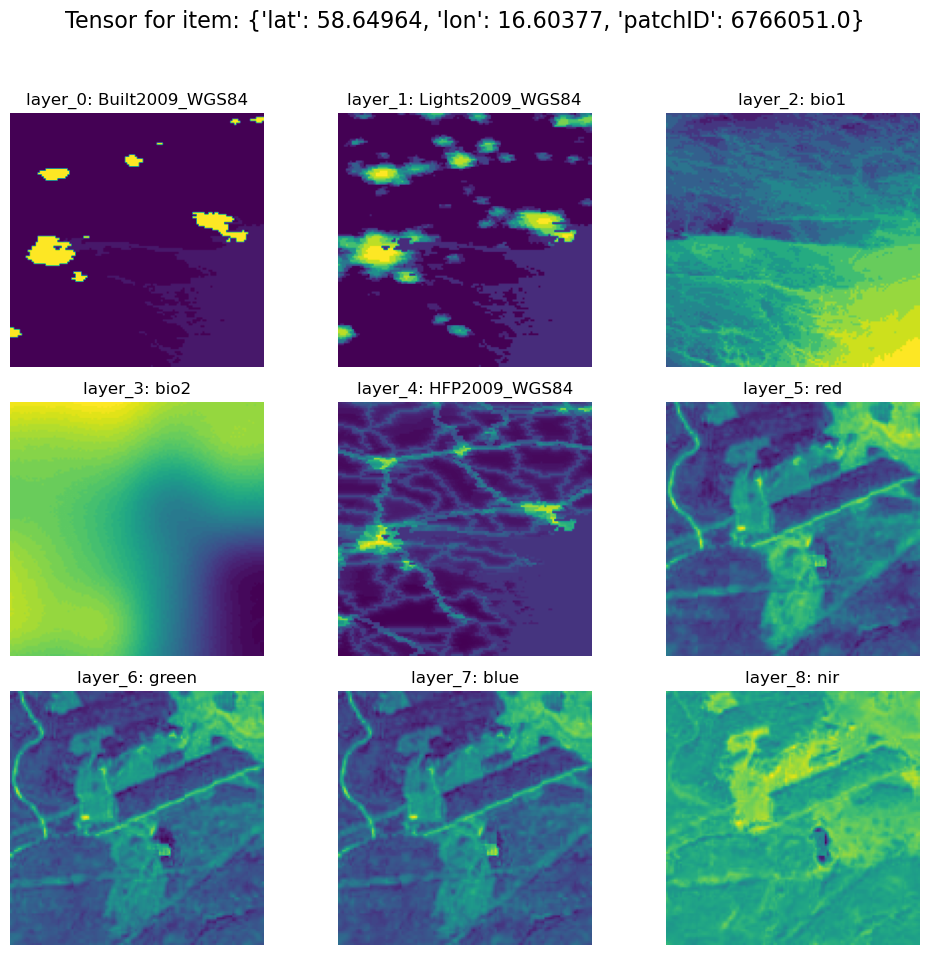

Tensor type: <class 'torch.Tensor'>, tensor shape: torch.Size([9, 128, 128]), label: 3659


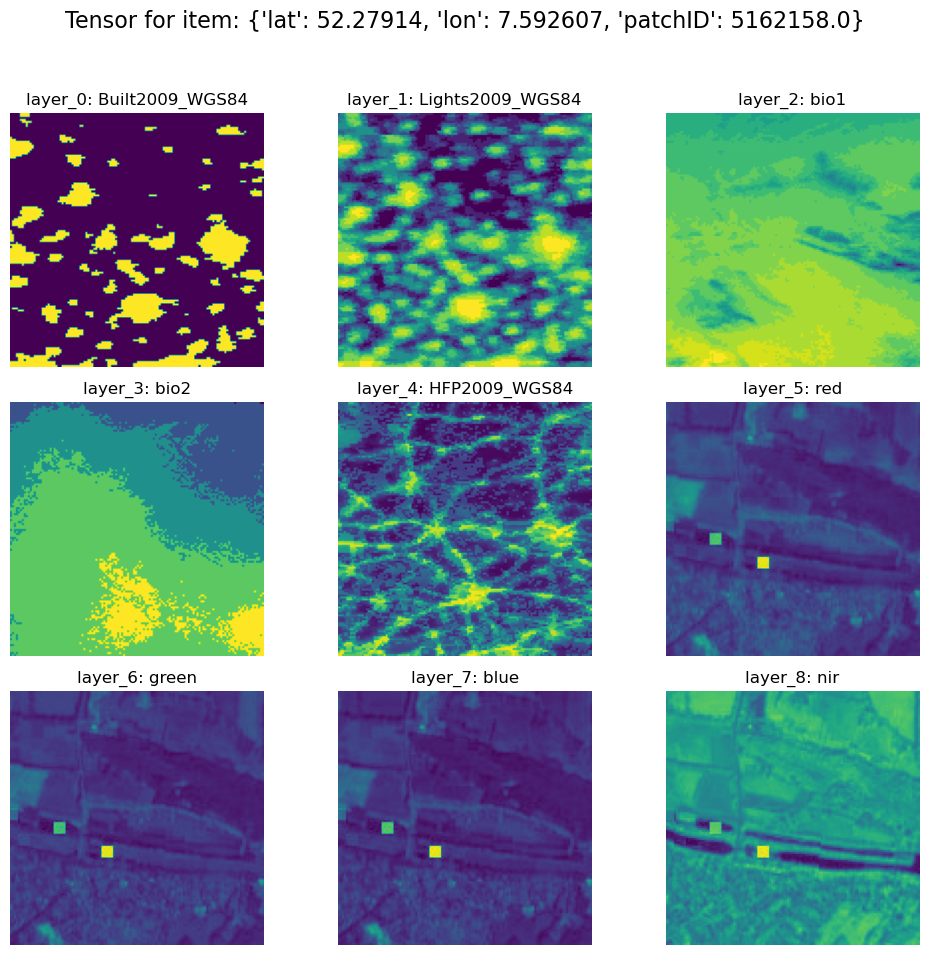

Tensor type: <class 'torch.Tensor'>, tensor shape: torch.Size([9, 128, 128]), label: 5154


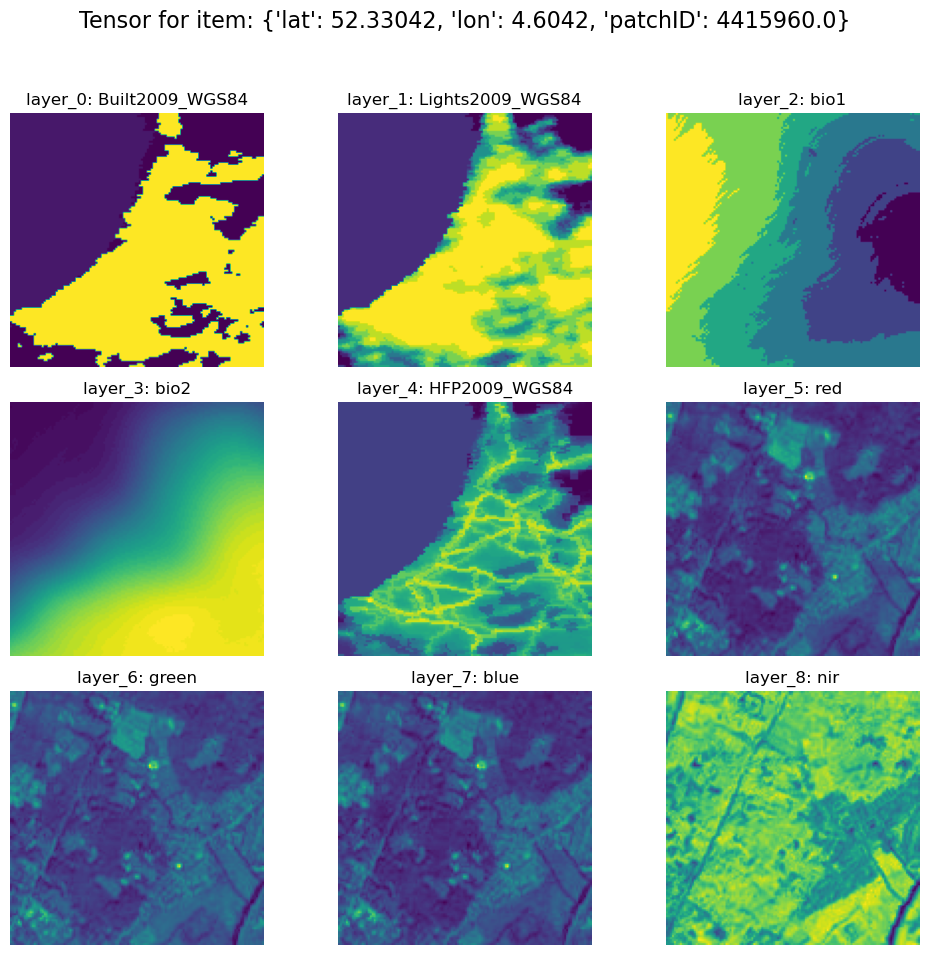

Tensor type: <class 'torch.Tensor'>, tensor shape: torch.Size([9, 128, 128]), label: 1706


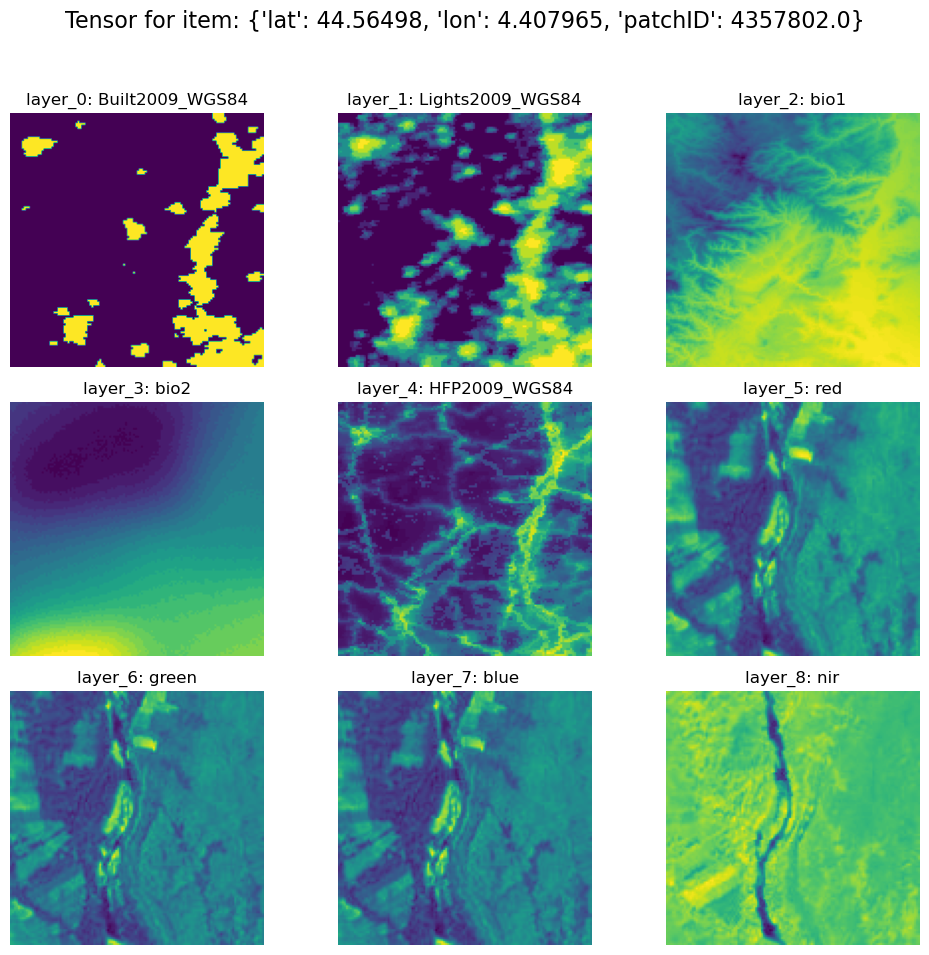

Tensor type: <class 'torch.Tensor'>, tensor shape: torch.Size([9, 128, 128]), label: 4143


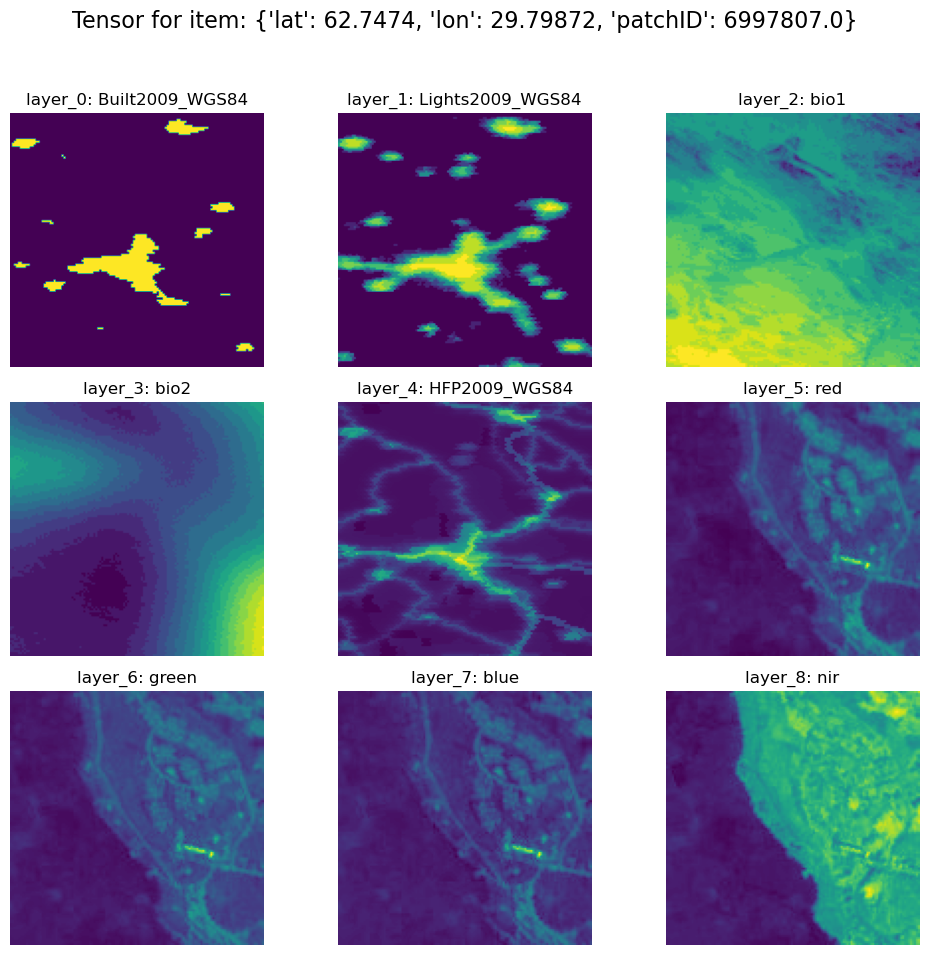

In [9]:
import random

# print random tensors from dataset
ids = [random.randint(0, len(dataset)-1) for i in range(5)]
for id in ids:
    tensor, label = dataset[id]
    print('Tensor type: {}, tensor shape: {}, label: {}'.format(type(tensor), tensor.shape, label))
    dataset.plot_patch(id)

## Torch dataloader

The ``PatchesDataset`` can be then wrapped in a torch dataloader:

In [10]:
import torch

train_loader = torch.utils.data.DataLoader(dataset, shuffle=True, batch_size=64,  num_workers=8)

first_batch_tensor, first_batch_labels = next(iter(train_loader))
print(first_batch_tensor)
print(first_batch_tensor.shape)

tensor([[[[ 0.0000,  0.0000,  0.0000,  ..., -0.2597, -0.2597, -0.2597],
          [ 0.0000,  0.0000, -0.2597,  ..., -0.2597, -0.2597, -0.2597],
          [-0.2597, -0.2597, -0.2597,  ..., -0.2597, -0.2597, -0.2597],
          ...,
          [-0.2597, -0.2597,  0.0000,  ..., -0.2597, -0.2597, -0.2597],
          [-0.2597,  0.0000,  0.0000,  ..., -0.2597, -0.2597, -0.2597],
          [ 0.0000,  0.0000,  0.0000,  ..., -0.2597, -0.2597, -0.2597]],

         [[ 0.0000,  0.0000,  0.0000,  ...,  1.4273,  0.6643,  0.6643],
          [ 0.0000,  0.0000, -0.4803,  ...,  1.4273,  1.0458,  1.0458],
          [-0.4803, -0.4803, -0.4803,  ...,  0.2827, -0.0988, -0.0988],
          ...,
          [-0.4803, -0.4803,  0.0000,  ..., -0.4803, -0.4803, -0.4803],
          [-0.4803,  0.0000,  0.0000,  ..., -0.4803, -0.0988,  0.2827],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.2827,  0.2827,  0.6643]],

         [[-0.2094, -0.2303, -0.2617,  ..., -0.3870, -0.3661, -0.2617],
          [-0.1990, -0.1990, -

In [13]:
# create dataset
multi_dataset = PatchesDatasetMultiLabel(
    occurrences=data_path+'Presence_only_occurrences/Presences_only_train_sample.csv',
    providers=(p_hfp_d, p_bioclim, p_hfp_s, p_rgb))

In [16]:
train_loader = torch.utils.data.DataLoader(multi_dataset, shuffle=True, batch_size=64,  num_workers=8)

first_batch_tensor, first_batch_labels = next(iter(train_loader))
print(first_batch_tensor)
print(first_batch_tensor.shape)

tensor([[[[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          ...,
          [-0.2597, -0.2597, -0.2597,  ..., -0.2597, -0.2597, -0.2597],
          [-0.2597, -0.2597, -0.2597,  ..., -0.2597, -0.2597, -0.2597],
          [-0.2597, -0.2597, -0.2597,  ..., -0.2597, -0.2597, -0.2597]],

         [[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          ...,
          [-0.4803, -0.4803, -0.4803,  ...,  0.2827,  0.2827, -0.0988],
          [-0.4803, -0.4803, -0.4803,  ..., -0.0988, -0.0988, -0.0988],
          [-0.0988, -0.0988, -0.4803,  ..., -0.0988, -0.0988,  0.2827]],

         [[-0.2199, -0.2199, -0.2199,  ..., -0.2408, -0.2303, -0.2303],
          [-0.2199, -0.2199, -

In [18]:
print(first_batch_labels)
print(first_batch_labels.shape)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], dtype=torch.float64)
torch.Size([64, 100])
